# Import Necessary Packages, Training and Test Data

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random

In [2]:
train_df = pd.read_csv('train-1000-100.csv')
test_df = pd.read_csv('test-1000-100.csv')

# Functions

In [3]:
def feature_target(df, col):
    
    df_f = df.iloc[:,:col] # feature
    df_t = df.iloc[:,col] # target
    
    return df_f, df_t

In [4]:
def get_w(features, target, lamb):
        
    X = np.matrix(features) # X
    y = np.matrix(target) # y

    X_squared_L2 = (X.T * X) + (lamb * np.identity(len((X.T * X)))) #removed dim parameter in favor of len()

    X_dagger_L2 = X_squared_L2.I * X.T

    w = X_dagger_L2 * y.T

    return w

In [5]:
def mse_func(w, feature_col, target_col):
    """Returns Mean Squared Error"""
    
    w = w.T
    l = list()
    
    for i in range(len(target_col)):
        y_pred = np.sum(np.array(w) * np.array(feature_col.iloc[i,:]))
        y = np.array(target_col.iloc[i])                
        score = (y - y_pred)**2
        l.append(score)
        
    mse = np.sum(l)/len(target_col)
    return mse

In [6]:
def rand_sub(train_df, test_sub, sub_size, lamb):
    """Takes 20 random samples of size n"""
    
    list_train_subs = list()
    list_test_subs = list()
    for i in range(20):
        start = random.sample([1,2,3,4,5,6,7,8,9,10], 1)[0]
        stop =  start + sub_size 
        train_sub = train_df.iloc[start:stop,:]
        test_sub = test_df.iloc[start:stop,:]
        
        f_train,t_train = feature_target(train_sub, 100)
        f_test,t_test = feature_target(test_sub, 100)
        
        w = get_w(f_train,t_train, lamb)
        
        mse_train = mse_func(w, f_train,t_train) # get mse values for train data (In Error)
        mse_test = mse_func(w, f_test,t_test) # get mse values for test data (Out Error)
        
        list_train_subs.append(mse_train)
        list_test_subs.append(mse_test)
        
        mse_train_avg = np.average(list_train_subs)
        mse_test_avg = np.average(list_test_subs)
        
    return mse_train_avg, mse_test_avg

# First Graph $λ = 1$

In [15]:
levels = [10,15,30,50,75,100,150,250,350,500,750,1000]

train_1 = list()
test_1 = list()

for i in levels:
    train, test = rand_sub(train_df, train_df, i, 1)
    train_1.append(train)
    test_1.append(test)

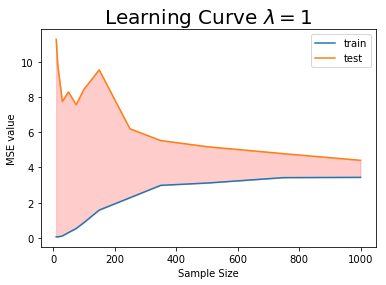

In [16]:
plt.figure()
plt.plot(levels, train_1)
plt.plot(levels, test_1)
plt.fill_between(levels, train_1,test_1, color = 'red', alpha='0.2')
plt.legend(['train','test'])
plt.xlabel('Sample Size')
plt.ylabel('MSE value')
plt.title('Learning Curve $λ = 1$', size = 20)
#plt.savefig('Q3_plot_1.pdf')
plt.show()

# Second Graph $λ = 25$

In [9]:
levels = [10,15,30,50,75,100,150,250,350,500,750,1000]

train_25 = list()
test_25 = list()

for i in levels:
    train, test = rand_sub(train_df, train_df, i, 25)
    train_25.append(train)
    test_25.append(test)

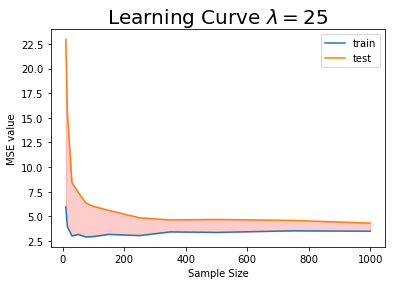

In [10]:
plt.figure()
plt.plot(levels, train_25)
plt.plot(levels, test_25)
plt.fill_between(levels, train_25,test_25, color = 'red', alpha='0.2')
plt.legend(['train','test'])
plt.xlabel('Sample Size')
plt.ylabel('MSE value')
plt.title('Learning Curve $λ = 25$', size = 20)

plt.savefig('Q3_plot_2.pdf')
plt.show()

# Third Graph $λ = 150$

In [11]:
levels = [10,15,30,50,75,100,150,250,350,500,750,1000]

train_150 = list()
test_150 = list()

for i in levels:
    train, test = rand_sub(train_df, train_df, i, 150)
    train_150.append(train)
    test_150.append(test)

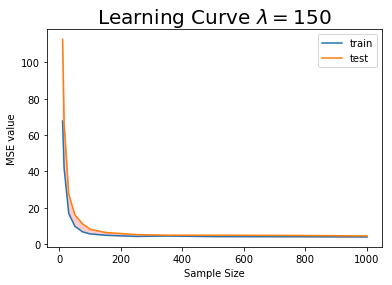

In [12]:
plt.figure()
plt.plot(levels, train_150)
plt.plot(levels, test_150)
plt.fill_between(levels, train_150,test_150, color = 'red', alpha='0.2')
plt.legend(['train','test'])
plt.xlabel('Sample Size')
plt.ylabel('MSE value')
plt.title('Learning Curve $λ = 150$', size = 20)
#plt.savefig('Q3_plot_3.pdf')
plt.show()